# Wrangle and Analyze Twitter WeRateDogs Data by Minsup Sim

__Purpose__: The purpose of this project is to gather data using Tweepy python library and with gathered data and given archived dataset, wrangle WeRAteDogs Twitter data to create analyses and visualizations. 

In [3]:
#importing libraries needed
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import tweepy
import json
import re

### Gathering Data

In [4]:
#importing data
tweet_df = pd.read_csv('twitter-archive-enhanced.csv')
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [5]:
#just made a quick change of tweet_id data type also written in assess section
tweet_df.tweet_id = tweet_df.tweet_id.astype('str')

In [6]:
#getting prediction dataset from Udacity Server
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image-predictions.tsv','wb') as file:
    file.write(response.content)

In [7]:
tweet_predict = pd.read_csv('image-predictions.tsv', sep=('\t'))
tweet_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [259]:
tweet_predict.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [52]:
#logging into twitterAPI using tweepy library
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

In [175]:
#putting each status into list
list_of_id = tweet_df.tweet_id.tolist()

list_retweets = []

for ids in list_of_id:   
    try:
        list_retweets.append(api.get_status(ids))
    except Exception as e:
        print(e)

[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
Rate limit reached. Sleeping for: 682
Rate limit reached. Sleeping for: 689


In [176]:
#creating dictionary and then making JSON file using dictionary
list_of_dicts = []

for json_tweet in list_retweets:
    list_of_dicts.append(json_tweet._json)
with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(list_of_dicts, indent=4))

In [8]:
#creating dataframe with retweet_count and favorite_count
retweet_list=[]
with open('tweet_json.txt', encoding='utf-8') as file:  
    data = json.load(file)
    for each_dict in data:
        tweet_id = each_dict['id']
        favorite_count = each_dict['favorite_count']
        retweet_count = each_dict['retweet_count'] 
    
        retweet_list.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count)
                            })
        retweet_json = pd.DataFrame(retweet_list, columns = ['tweet_id', 'favorite_count', 
                                                       'retweet_count'])

In [9]:
retweet_json

,tweet_id,favorite_count,retweet_count
0,892420643555336193,38952,8636
1,892177421306343426,33350,6344
2,891815181378084864,25125,4210
3,891689557279858688,42297,8756
4,891327558926688256,40454,9518
5,891087950875897856,20292,3155
6,890971913173991426,11897,2100
7,890729181411237888,65798,19147
8,890609185150312448,27867,4318
9,890240255349198849,32052,7516


### Assess

In [10]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

In [261]:
#checking to see if there is any duplicated IDs
tweet_df.tweet_id.duplicated().value_counts()

False    2356
Name: tweet_id, dtype: int64

In [262]:
tweet_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1685,681654059175129088,NaN,NaN,2015-12-29 01:52:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Toffee. He's a happy pupper. Appears d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681654059...,12,10,Toffee,None,None,pupper,None
921,756288534030475264,NaN,NaN,2016-07-22 00:43:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a heartwarming scene of a single father...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/756288534...,12,10,None,None,None,None,None
1087,738156290900254721,NaN,NaN,2016-06-01 23:52:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Storkson. He's wet and sad. 10/10 chee...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/738156290...,10,10,Storkson,None,None,None,None
2165,669367896104181761,NaN,NaN,2015-11-25 04:11:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chip. Chip's pretending to be choked. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669367896...,10,10,Chip,None,None,None,None
1760,678708137298427904,NaN,NaN,2015-12-20 22:46:44 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here we are witnessing a wild field pupper. Lo...,NaN,NaN,NaN,https://vine.co/v/eQjxxYaQ60K,10,10,None,None,None,pupper,None


In [20]:
tweet_df[tweet_df.text.str.contains('\d+\.\d+\/\d+')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've been told there's a slight possibility he...,NaN,NaN,NaN,NaN,5,10,None,None,None,None,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726...,26,10,None,None,None,None,None


#### tweet_df

##### Visual assess:
- in_reply_to_status_id & in_reply_to_user_id&retweeted_status_id&retweeted_status_user_id, retweeted_status_timestamp should be deleted

##### Quality
- changed tweet_id to string above
- in dog name, there are 55 values of 'a'
- timestamp should be in date time format
- tweet_id should be string
- source column should be categorized into Twitter for iPhone, Vine, Twitter Web, TweetDeck
- retweets should be deleted
- 883482846933004288,832215909146226688,786709082849828864,778027034220126208,681340665377193984,680494726643068929 has numerator that is not integer

##### Tidiness
- dog stages should be in one column

In [263]:
tweet_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [264]:
tweet_predict.tweet_id.duplicated().value_counts()

False    2075
Name: tweet_id, dtype: int64

In [265]:
tweet_predict.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [266]:
tweet_predict[tweet_predict.p1_conf==1.000000]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
106,667866724293877760,https://pbs.twimg.com/media/CUS9PlUWwAANeAD.jpg,1,jigsaw_puzzle,1.0,False,prayer_rug,1.011300e-08,False,doormat,1.740170e-10,False


In [267]:
#checking if there is any other duplicated columns in all three dataframes
all_columns = pd.Series(list(tweet_df)+list(tweet_predict)+list(retweet_json))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

#### tweet_predict

##### Visual assesss:
- predicted dog breeds with underbar between spaces

##### Quality
- This dataframe has less number of entries than tweet_df. 
- tweet_id to string
- twitter id 667866724293877760 has confidence of 100 percent in p1_conf when it is totally wrong probably it's 0.1

##### Tidiness
- this table can be joined to tweet_df
- tweet_id are in all three dataframes

In [268]:
retweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 3 columns):
tweet_id          2345 non-null object
favorite_count    2345 non-null int64
retweet_count     2345 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.0+ KB


#### retweet_json
##### Quality
- number of items does not match tweet_df since some of the ids were deleted

##### Tidiness
- This table should go into tweet_df

#### Creating Copies

In [21]:
#creating copies to perform cleaning
tweet_df_clean = tweet_df.copy()
tweet_predict_clean = tweet_predict.copy()
retweet_json_clean = retweet_json.copy()

### Clean

#### tweet_df

##### Define
delete retweets

##### Code

In [22]:
tweet_df_clean = tweet_df_clean.loc[tweet_df_clean.retweeted_status_timestamp.isnull()]

##### Test

In [23]:
tweet_df_clean.retweeted_status_timestamp.notnull().value_counts()

False    2175
Name: retweeted_status_timestamp, dtype: int64

##### Define
delete in_reply_to_status_id & in_reply_to_user_id&retweeted_status_id&retweeted_status_user_id, retweeted_status_timestamp

##### Code

In [24]:
tweet_df_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',\
               'retweeted_status_user_id','retweeted_status_timestamp'], axis=1, inplace=True)

##### Test

In [25]:
tweet_df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


##### Define

delete 55 values of 'a' in dog name

##### Code

In [26]:
tweet_df_clean.name = tweet_df_clean.name.replace('a','None')

##### Test

In [27]:
tweet_df_clean.name.value_counts()

None         735
Charlie       11
Lucy          11
Cooper        10
Oliver        10
Tucker         9
Penny          9
the            8
Winston        8
Sadie          8
Lola           8
Toby           7
Daisy          7
Jax            6
Oscar          6
Koda           6
Stanley        6
an             6
Bo             6
Bella          6
Bailey         6
Dave           5
Louis          5
Bentley        5
Milo           5
Scout          5
Rusty          5
Buddy          5
Leo            5
Chester        5
            ... 
Charl          1
Crouton        1
Stu            1
Carper         1
light          1
Barry          1
Flurpson       1
Arlo           1
Clyde          1
Eleanor        1
Traviss        1
Jordy          1
Jangle         1
Snickers       1
Scruffers      1
Ulysses        1
Pablo          1
Harry          1
Mutt           1
Quinn          1
Shooter        1
Brady          1
Dallas         1
Jessifer       1
Kanu           1
Lolo           1
Rodman         1
Sephie        

##### Define

timestamp should be in date time format

##### Code

In [28]:
import datetime

tweet_df_clean.timestamp = tweet_df_clean.timestamp.str[:-6]

In [29]:
for dates in tweet_df_clean.timestamp:
    tweet_df_clean.timestamp = datetime.datetime.strptime(str(dates),"%Y-%m-%d %H:%M:%S")

##### Test

In [30]:
tweet_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 220.9+ KB


##### Define

tweet_id should be string

##### Code

In [31]:
tweet_df_clean.tweet_id = tweet_df_clean.tweet_id.astype('str')

##### Test

In [32]:
tweet_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 220.9+ KB


##### Define

source column should be categorized into Twitter for iPhone, Vine, Twitter Web, TweetDeck

##### Code

In [33]:
tweet_df_clean.source = tweet_df_clean.source.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>','Iphone')
tweet_df_clean.source = tweet_df_clean.source.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>','Vine')
tweet_df_clean.source = tweet_df_clean.source.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>','Twitter Web')
tweet_df_clean.source = tweet_df_clean.source.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>','TwitterDeck')

##### Test

In [34]:
tweet_df_clean.source.value_counts()

Iphone         2042
Vine             91
Twitter Web      31
TwitterDeck      11
Name: source, dtype: int64

##### Define
make dog stages into one column

##### Code

In [35]:
tweet_df_clean['dog_stage'] = tweet_df_clean.doggo+tweet_df_clean.floofer+tweet_df_clean.pupper+tweet_df_clean.puppo

In [36]:
tweet_df_clean.dog_stage = tweet_df_clean.dog_stage.str.replace('None','')

In [37]:
tweet_df_clean.dog_stage[tweet_df_clean.dog_stage=='']='None'

C:\Users\m-sim\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [38]:
tweet_df_clean.drop(['doggo','floofer','pupper','puppo'],axis=1,inplace=True)

##### Test

In [39]:
tweet_df_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2015-11-15 22:32:08,Iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,2015-11-15 22:32:08,Iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,2015-11-15 22:32:08,Iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
3,891689557279858688,2015-11-15 22:32:08,Iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
4,891327558926688256,2015-11-15 22:32:08,Iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None
5,891087950875897856,2015-11-15 22:32:08,Iphone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None
6,890971913173991426,2015-11-15 22:32:08,Iphone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None
7,890729181411237888,2015-11-15 22:32:08,Iphone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None
8,890609185150312448,2015-11-15 22:32:08,Iphone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None
9,890240255349198849,2015-11-15 22:32:08,Iphone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo


##### Define

change numerator of ids: 883482846933004288,832215909146226688,786709082849828864,778027034220126208,681340665377193984,680494726643068929

##### Code

In [45]:
tweet_df_clean.loc[tweet_df_clean.tweet_id=='883482846933004288', 'rating_numerator']= 13.5
tweet_df_clean.loc[tweet_df_clean.tweet_id=='832215909146226688','rating_numerator'] = 9.75
tweet_df_clean.loc[tweet_df_clean.tweet_id=='786709082849828864','rating_numerator'] = 9.75
tweet_df_clean.loc[tweet_df_clean.tweet_id=='778027034220126208','rating_numerator'] = 11.27
tweet_df_clean.loc[tweet_df_clean.tweet_id=='681340665377193984','rating_numerator'] = 9.5
tweet_df_clean.loc[tweet_df_clean.tweet_id=='680494726643068929','rating_numerator'] = 11.26

##### Test

In [46]:
tweet_df_clean[tweet_df_clean.text.str.contains('\d+\.\d+\/\d+')]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
45,883482846933004288,2015-11-15 22:32:08,Iphone,This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,13.50,10,Bella,None
695,786709082849828864,2015-11-15 22:32:08,Iphone,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,9.75,10,Logan,None
763,778027034220126208,2015-11-15 22:32:08,Iphone,This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,11.27,10,Sophie,pupper
1689,681340665377193984,2015-11-15 22:32:08,Iphone,I've been told there's a slight possibility he...,NaN,9.50,10,None,None
1712,680494726643068929,2015-11-15 22:32:08,Iphone,Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,11.26,10,None,None


In [70]:
tweet_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2174
Data columns (total 11 columns):
tweet_id              2117 non-null object
timestamp             2117 non-null datetime64[ns]
source                2117 non-null object
text                  2117 non-null object
expanded_urls         2117 non-null object
rating_numerator      2117 non-null float64
rating_denominator    2117 non-null int64
name                  2117 non-null object
dog_stage             2117 non-null object
favorite_count        2117 non-null int64
retweet_count         2117 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 198.5+ KB


#### tweet_predict

##### Define

predicted dog breeds with underbar between spaces

##### Code

In [47]:
tweet_predict_clean.p1 = tweet_predict_clean.p1.str.replace("_"," ")
tweet_predict_clean.p2 = tweet_predict_clean.p2.str.replace("_"," ")
tweet_predict_clean.p3 = tweet_predict_clean.p3.str.replace("_"," ")

##### Test

In [48]:
tweet_predict_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese mountain dog,0.651137,True,English springer,0.263788,True,Greater Swiss Mountain dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box turtle,0.933012,False,mud turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan mastiff,0.058279,True,fur coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping cart,0.962465,False,shopping basket,0.014594,False,golden retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature poodle,0.201493,True,komondor,0.192305,True,soft-coated wheaten terrier,0.082086,True


##### Define

tweet_id to string

##### Code

In [49]:
tweet_predict_clean.tweet_id = tweet_predict_clean.tweet_id.astype('str')

##### Test

In [50]:
tweet_predict_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


##### Define

change twitter id 667866724293877760's confidence of 100 percent in p1_conf

##### Code

In [51]:
tweet_predict_clean.iloc[106,4] = tweet_predict_clean.iloc[106,4]/10

##### Test

In [52]:
tweet_predict_clean[tweet_predict_clean.tweet_id=='667866724293877760']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
106,667866724293877760,https://pbs.twimg.com/media/CUS9PlUWwAANeAD.jpg,1,jigsaw puzzle,0.1,False,prayer rug,1.011300e-08,False,doormat,1.740170e-10,False


#### retweet_json

##### Define

number of items does not match tweet_df since some of the ids were deleted

This table should go into tweet_df

##### Code

In [53]:
tweet_df_clean = pd.merge(left = tweet_df_clean, right = retweet_json_clean, how='left',on='tweet_id')

##### Test

In [54]:
tweet_df_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count
0,892420643555336193,2015-11-15 22:32:08,Iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None,38952,8636
1,892177421306343426,2015-11-15 22:32:08,Iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None,33350,6344
2,891815181378084864,2015-11-15 22:32:08,Iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,None,25125,4210
3,891689557279858688,2015-11-15 22:32:08,Iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,None,42297,8756
4,891327558926688256,2015-11-15 22:32:08,Iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,None,40454,9518
5,891087950875897856,2015-11-15 22:32:08,Iphone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10,None,None,20292,3155
6,890971913173991426,2015-11-15 22:32:08,Iphone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10,Jax,None,11897,2100
7,890729181411237888,2015-11-15 22:32:08,Iphone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10,None,None,65798,19147
8,890609185150312448,2015-11-15 22:32:08,Iphone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,10,Zoey,None,27867,4318
9,890240255349198849,2015-11-15 22:32:08,Iphone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10,Cassie,doggo,32052,7516


##### Define

Delete replies without urls

##### Code

In [55]:
tweet_df_clean = tweet_df_clean.loc[tweet_df_clean.expanded_urls.notnull()]

##### Test

In [56]:
tweet_df_clean.loc[tweet_df_clean.expanded_urls.isnull()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count


#### Creating Master Dataframe

In [57]:
tweet_df_master = pd.merge(left = tweet_df_clean, right = tweet_predict_clean, how='left',on='tweet_id')

#### Check

In [58]:
tweet_df_master

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2015-11-15 22:32:08,Iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None,38952,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2015-11-15 22:32:08,Iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None,33350,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2015-11-15 22:32:08,Iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,None,25125,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2015-11-15 22:32:08,Iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,None,42297,...,1.0,paper towel,0.170278,False,Labrador retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2015-11-15 22:32:08,Iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,None,40454,...,2.0,basset,0.555712,True,English springer,0.225770,True,German short-haired pointer,0.175219,True
5,891087950875897856,2015-11-15 22:32:08,Iphone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10,None,None,20292,...,1.0,Chesapeake Bay retriever,0.425595,True,Irish terrier,0.116317,True,Indian elephant,0.076902,False
6,890971913173991426,2015-11-15 22:32:08,Iphone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10,Jax,None,11897,...,1.0,Appenzeller,0.341703,True,Border collie,0.199287,True,ice lolly,0.193548,False
7,890729181411237888,2015-11-15 22:32:08,Iphone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10,None,None,65798,...,2.0,Pomeranian,0.566142,True,Eskimo dog,0.178406,True,Pembroke,0.076507,True
8,890609185150312448,2015-11-15 22:32:08,Iphone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,10,Zoey,None,27867,...,1.0,Irish terrier,0.487574,True,Irish setter,0.193054,True,Chesapeake Bay retriever,0.118184,True
9,890240255349198849,2015-11-15 22:32:08,Iphone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10,Cassie,doggo,32052,...,1.0,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True


In [59]:
tweet_df_master.to_csv('twitter_archive_master.csv', index=False)

### Analyze and Visualize

In [60]:
twitter = pd.read_csv('twitter_archive_master.csv')

In [61]:
#changing tweet_id to string
twitter.tweet_id = twitter.tweet_id.astype('str')

In [62]:
#creating rating column to perform analysis
twitter['rating'] = twitter.rating_numerator/twitter.rating_denominator

In [63]:
#checking quantiles, mean and std
twitter.rating.describe()

count    2117.000000
mean        1.165074
std         3.944560
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max       177.600000
Name: rating, dtype: float64

In [64]:
#changing wrong rating after checking actual tweet
twitter.loc[twitter.tweet_id == '722974582966214656', 'rating_numerator'] = 13
twitter.loc[twitter.tweet_id == '722974582966214656', 'rating_denominator'] = 10

In [65]:
#most commonly used source for twitter
twitter.source.value_counts()

Iphone         1985
Vine             91
Twitter Web      30
TwitterDeck      11
Name: source, dtype: int64

In [66]:
#most common name used
twitter.name.value_counts()

None         677
Charlie       11
Lucy          11
Cooper        10
Oliver        10
Tucker         9
Penny          9
the            8
Winston        8
Sadie          8
Lola           8
Toby           7
Daisy          7
Jax            6
Oscar          6
Koda           6
Stanley        6
an             6
Bo             6
Bella          6
Bailey         6
Dave           5
Louis          5
Bentley        5
Milo           5
Scout          5
Rusty          5
Buddy          5
Leo            5
Chester        5
            ... 
Charl          1
Crouton        1
Stu            1
Carper         1
light          1
Barry          1
Flurpson       1
Arlo           1
Clyde          1
Eleanor        1
Traviss        1
Jordy          1
Jangle         1
Snickers       1
Scruffers      1
Ulysses        1
Pablo          1
Harry          1
Mutt           1
Quinn          1
Shooter        1
Brady          1
Dallas         1
Jessifer       1
Kanu           1
Lolo           1
Rodman         1
Sephie        

#### Does higher rating means higher retweets? or higher favorite counts?

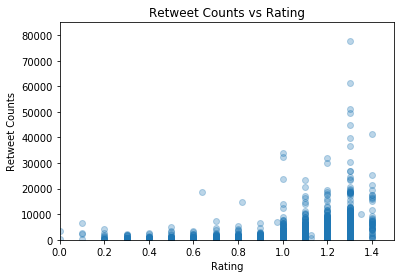

In [67]:
plt.scatter(twitter.rating, twitter.retweet_count, alpha=0.3)
plt.axis([0,1.5,0,85000])
plt.title('Retweet Counts vs Rating')
plt.xlabel('Rating')
plt.ylabel('Retweet Counts')
plt.savefig('retweetvsrating.png')

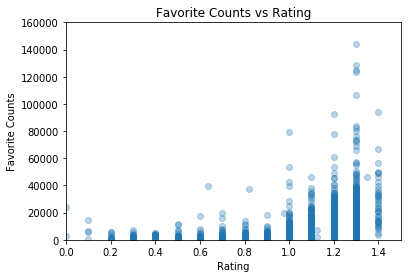

In [68]:
plt.scatter(twitter.rating, twitter.favorite_count, alpha=0.3)
plt.axis([0,1.5,0,160000])
plt.title('Favorite Counts vs Rating')
plt.xlabel('Rating')
plt.ylabel('Favorite Counts')
plt.savefig('favoritevsrating.png')
plt.show()

#### which stage dog is most popular

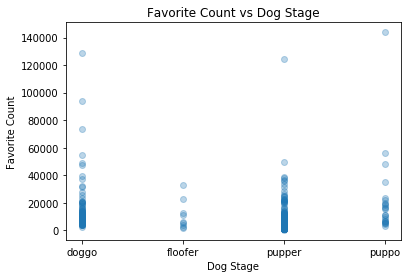

In [69]:
subset_dog_stage = twitter[twitter.dog_stage.isin(['doggo','puppo','floofer','pupper'])]
plt.scatter(subset_dog_stage.dog_stage, subset_dog_stage.favorite_count, alpha=0.3)
plt.title('Favorite Count vs Dog Stage')
plt.xlabel('Dog Stage')
plt.ylabel('Favorite Count')
plt.savefig('favoritevsstage.png')